In [4]:
import pandas as pd
import numpy as np
import pyvista as pv
import vtk
import trame
pv.set_jupyter_backend('trame')

In [ ]:
df = pd.read_csv('output.csv')
df

In [48]:
import numpy as np

import pyvista as pv
# Define some helpers - ignore these and use your own data.
def generate_points(length=10,width=5,height=5,num_cand=100,etagen=3):
    x = np.linspace(0, length, num=num_cand)
    y = np.linspace(0, width, num=num_cand)
    z = np.linspace(0, height, num=num_cand)
    etagenlist = np.linspace(0, etagen, num=etagen+1)
    points = []
    for i in x:
        for j in etagenlist:
            points.append([etagen*i, 0, 0])
            points.append([etagen*i, 0, (height*(j-1))+height])
            points.append([etagen*i, (width*(j-1))+width, 0])
            points.append([etagen*i, (width*(j-1))+width, (height*(j-1))+height])

    for i in y:
        for j in etagenlist:
            points.append([0, j*i, 0])
            points.append([0, j*i, j*height])
            points.append([0, j*i, height])
            points.append([j*length, j*i, 0])
            points.append([j*length, j*i, j*height])
        
    for i in z:
        for j in etagenlist:
            points.append([0, 0, j*i])
            points.append([0, j*width, j*i])
            points.append([0, width, j*i])
            points.append([j*length, 0, j*i])
            points.append([j*length, j*width, j*i])
        
    points = np.array(points)

    return points

points = generate_points()
# Print first 5 rows to prove its a numpy array (n_points by 3)
# Columns are (X Y Z)
points[0:5, :]


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [22]:
length = 10
width = 5
height = 5
num_cand = 100
etagen = 3
x = np.linspace(0, length, num=num_cand)
y = np.linspace(0, width, num=num_cand)
z = np.linspace(0, height, num=num_cand)
etagen = np.linspace(0, etagen, num=etagen+1)
points = []
for i in x:
    for j in etagen:
        points.append([i, 0, 0])
        points.append([i, 0, j*height])
        points.append([i, j*width, 0])
        points.append([i, j*width, j*height])

In [23]:
etagen

array([0., 1., 2., 3.])

In [3]:
points

array([[ 0.,  0.,  0.],
       [ 0.,  0., 10.],
       [ 0., 10.,  0.],
       ...,
       [ 0., 10., 10.],
       [10.,  0., 10.],
       [10., 10., 10.]])

In [43]:
points.__len__()

5600

In [49]:
point_cloud = pv.PolyData(points)
point_cloud

PolyData,Information
N Cells,5600
N Points,5600
N Strips,0
X Bounds,"0.000e+00, 3.000e+01"
Y Bounds,"0.000e+00, 1.500e+01"
Z Bounds,"0.000e+00, 1.500e+01"
N Arrays,0


In [50]:
import pyvista as pv
from pyvista import set_jupyter_backend

# Now create the plotter
plotter = pv.Plotter(notebook=True)

In [51]:
plotter.add_mesh(point_cloud, color='maroon', point_size=10.0, render_points_as_spheres=True)

plotter.show_grid()
plotter.show()

Widget(value='<iframe src="http://localhost:57434/index.html?ui=P_0x1eca810cf70_10&reconnect=auto" class="pyvi…

In [ ]:
point_cloud.plot(eye_dome_lighting=True)

In [6]:
# Make data array using z-component of points array
data = points[:, -1]

# Add that data to the mesh with the name "uniform dist"
point_cloud["elevation"] = data

C:\Users\paulh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (C:\Users\paulh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


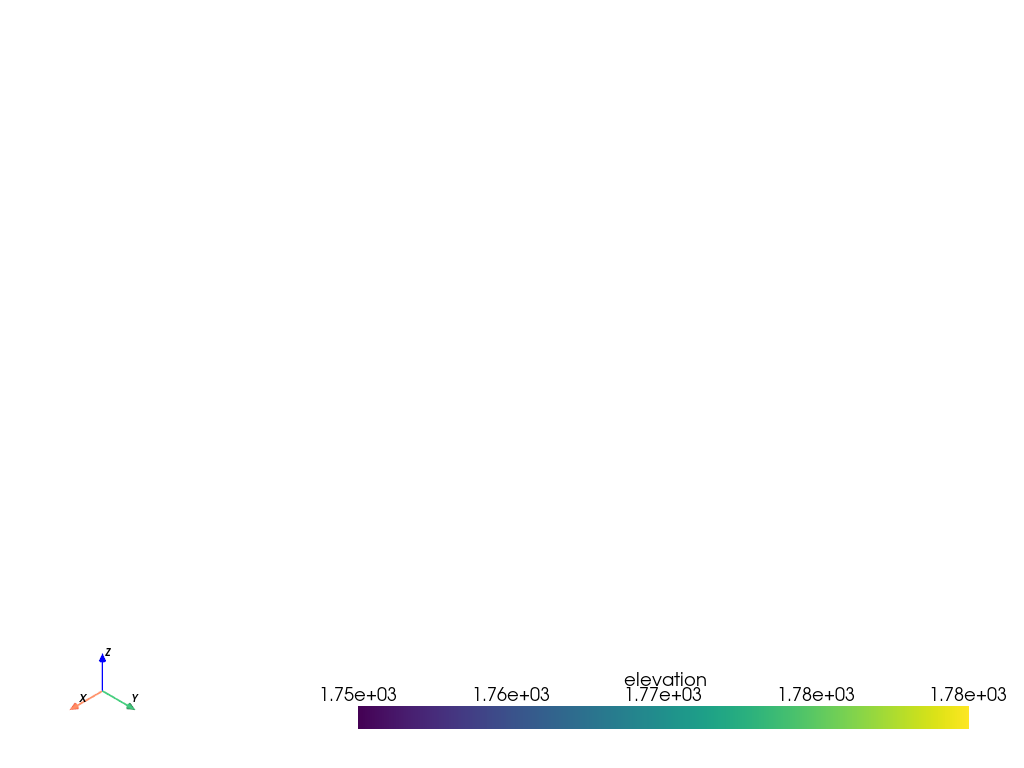

In [8]:
point_cloud.plot(render_points_as_spheres=True)